In [1]:
%load_ext autoreload
%autoreload 2

import DataSets
from DataSets import *
import DataGeneration
from DataGeneration import *

import pandas as pd
import numpy as np
import sklearn 

np.set_printoptions(suppress=True)

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
#np.set_printoptions(suppress=True)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
seed = 2021
np.random.seed(seed)

In [3]:
x, y, attributes, classes, full = IrisDataSet()
#x, y, attributes, classes, full = DiabetesDataSetQuant()
#x, y, attributes, classes, full = DiabetesDataSetAbsolut()
#x, y, attributes, classes, full = BostonHPDataSetQuant()
#x, y, attributes, classes, full = BostonHPDataSetAbsolut()
#x, y, attributes, classes, full = CaliforniaDataSetQuant()
#x, y, attributes, classes, full = CaliforniaDataSetAbsolut()
#x, y, attributes, classes, full = CaliforniaHLDataSetQuant()
#x, y, attributes, classes, full = CaliforniaHLDataSetAbsolut()
#x, y, attributes, classes, full = OccupancyDataSet()

In [4]:
x_train_bb, x_rest, y_train_bb, y_rest = train_test_split(x, y, test_size=0.2, random_state=seed)
x_similar, x_test, y_similar, y_test = train_test_split(x_rest, y_rest, test_size=0.5, random_state=seed)

(120, 4)
(15, 4)
(15, 4)


(array([36.,  0.,  0.,  0.,  0., 40.,  0.,  0.,  0., 44.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

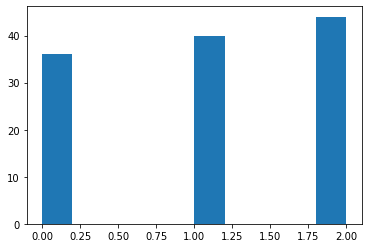

In [5]:
print(x_train_bb.shape)
print(x_similar.shape)
print(x_test.shape)
plt.hist(y_train_bb)
#plt.hist(y_similar)
#plt.hist(y_test)

In [6]:
NeuralBlackBox = MLPClassifier(solver='adam', alpha=1e-5,
                    hidden_layer_sizes=(10, 10, 10, 10, 10, 10, 10, 10, 10, 10), max_iter=20000, random_state = seed, n_iter_no_change=10)

NeuralBlackBox.fit(x_train_bb, y_train_bb)
bb1 = NeuralBlackBox

print(NeuralBlackBox.get_params(deep=True))
print("TrainScore: How good is the training data classified by the black box")
print(NeuralBlackBox.score(x_train_bb, y_train_bb, sample_weight=None))
print("SimilarScore: How good is the similar data classified by the black box")
print(NeuralBlackBox.score(x_similar, y_similar, sample_weight=None))
print("TestScore: How good is the test data classified by the black box")
print(NeuralBlackBox.score(x_test, y_test, sample_weight=None))


{'activation': 'relu', 'alpha': 1e-05, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (10, 10, 10, 10, 10, 10, 10, 10, 10, 10), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 20000, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 2021, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
TrainScore: How good is the training data classified by the black box
0.9833333333333333
SimilarScore: How good is the similar data classified by the black box
1.0
TestScore: How good is the test data classified by the black box
1.0


In [7]:
RandomForestBlackBox = RandomForestClassifier(n_estimators=10)
RandomForestBlackBox.fit(x_train_bb, y_train_bb)
bb2 = RandomForestBlackBox

print(RandomForestBlackBox.get_params(deep=True))
print("TrainScore: How good is the training data classified by the black box")
print(RandomForestBlackBox.score(x_train_bb, y_train_bb, sample_weight=None))
print("SimilarScore: How good is the similar data classified by the black box")
print(RandomForestBlackBox.score(x_similar, y_similar, sample_weight=None))
print("TestScore: How good is the test data classified by the black box")
print(RandomForestBlackBox.score(x_test, y_test, sample_weight=None))

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
TrainScore: How good is the training data classified by the black box
1.0
SimilarScore: How good is the similar data classified by the black box
0.9333333333333333
TestScore: How good is the test data classified by the black box
0.9333333333333333


In [8]:
BlackBox = bb1
x_Sample = x_test[1]
ExampleInstance = x_Sample
target = -1
np.random.seed(seed)

x_250_RandomUniform = RandomFromMinMaxUniform(MinMax_2d(x_train_bb), 250, seed)
x_250_RandomNormalSample = RandomAroundSampleNormal(x_Sample,MinMax_2d(x_train_bb),250,seed, 0.15)
x_250_SynthDistAll = DensityApproximation(x_train_bb, 250, seed)
x_250_RandomRows = RandomRows(x_train_bb, 250, seed)

x_1000 = np.vstack([x_250_RandomUniform,x_250_RandomNormalSample,x_250_SynthDistAll,x_250_RandomRows])

x_bb_test = RandomAroundSampleNormal(x_Sample,MinMax_2d(x_train_bb),1000,seed, 0.1)

x_GenAlgo_Gen0  = x_1000
y_GenAlgo_Gen0 = BlackBox.predict(x_GenAlgo_Gen0)
yff_GenAlgo_Gen0 = foil_classification_s(y_GenAlgo_Gen0, x_Sample, blackbox = BlackBox, target = target, comment_bool = False)


In [9]:

x_GenAlgo_fact = GenAlgo(x_1000, ExampleInstance, MinMax_2d(x_train_bb), 1, BlackBox, 1000, 6, 0.2 ,0.2, target = target)
x_GenAlgo_foil = GenAlgo(x_1000, ExampleInstance, MinMax_2d(x_train_bb), 0, BlackBox, 1000, 7, 0.2 ,0.2, target = target)


np.random.seed(seed)
x_GenAlgo  = np.vstack([x_GenAlgo_fact,x_GenAlgo_foil])
y_GenAlgo = BlackBox.predict(x_GenAlgo)
yff_GenAlgo = foil_classification_s(y_GenAlgo, x_Sample, blackbox = BlackBox, target = target, comment_bool = False)

LocalFoilTree = tree.DecisionTreeClassifier()
LocalFoilTree.fit(x_GenAlgo, yff_GenAlgo)

#print(LocalFoilTree.get_params(deep=True))
#print('FoilTree score on GenAlgo training data:')
#print(LocalFoilTree.score(x_GenAlgo, yff_GenAlgo, sample_weight=None))

#x_bb_test (is initialized above)
y_bb_test = BlackBox.predict(x_bb_test)
yff_bb_test = foil_classification_s(y_bb_test, x_Sample, blackbox = BlackBox, target = target, comment_bool = False)


In [10]:
SingleSample = x_Sample

n_nodes = LocalFoilTree.tree_.node_count
children_left = LocalFoilTree.tree_.children_left
children_right = LocalFoilTree.tree_.children_right
leaf_values = LocalFoilTree.tree_.value
classes = LocalFoilTree.classes_


feature = LocalFoilTree.tree_.feature
threshold = LocalFoilTree.tree_.threshold
parent = np.zeros(children_left.shape, dtype=int)
wrongway = np.zeros(children_left.shape, dtype=int)
leaf_value = np.zeros(children_left.shape, dtype=int)
leaf_might = np.zeros(children_left.shape, dtype=int)



for i_nodes in range(n_nodes):
    parent[children_left[i_nodes]] = i_nodes
    parent[children_right[i_nodes]] = i_nodes
    if feature[i_nodes] != -2:

        if SingleSample[feature[i_nodes]] <= threshold[i_nodes]:
            wrongway[children_left[i_nodes]] = wrongway[i_nodes] 
            wrongway[children_right[i_nodes]] = wrongway[i_nodes] + 1
        else:
            wrongway[children_left[i_nodes]] = wrongway[i_nodes] + 1
            wrongway[children_right[i_nodes]] = wrongway[i_nodes]
    else:
        leaf_value[i_nodes] = classes[np.argmax(leaf_values[i_nodes])]
        leaf_might[i_nodes] = np.sum(leaf_values[i_nodes])

#print(range(n_nodes))
#print(parent)
#print(children_left)
#print(children_right)
#print(feature)
#print(threshold)
#print(wrongway)
#print(leaf_might)
#print(leaf_value)
#print(classes)
#print(np.vstack([range(n_nodes),parent,children_left,children_right,feature,threshold,wrongway,leaf_might,leaf_value]))

In [11]:
#print(SingleSample)
CountFeatures = SingleSample.shape[0]
#print(CountFeatures)
TreeVsSampleDiff = np.zeros((CountFeatures, n_nodes))
#print(TreeVsSampleDiff)

for i_nodes in range(n_nodes):
    feature_Temp = feature[i_nodes].item()
    threshold_Temp = threshold[i_nodes].item()
    parent_Temp = parent[i_nodes].item()
    SingleSampleFeatureValue_Temp = SingleSample[feature_Temp].item()
    #print(SingleSampleFeatureValue_Temp)
    
    if children_left[i_nodes] == -1 and children_right[i_nodes] == -1:
        #print("leaf node :%s" %(i_nodes))
        continue
    for i_feature in feature:
        TreeVsSampleDiff[i_feature , children_right[i_nodes]] = TreeVsSampleDiff[i_feature , i_nodes]
        TreeVsSampleDiff[i_feature , children_left[i_nodes]] = TreeVsSampleDiff[i_feature , i_nodes]


    if SingleSampleFeatureValue_Temp + TreeVsSampleDiff[feature_Temp, parent_Temp].item()  <= threshold_Temp:
        TreeVsSampleDiff[feature_Temp , children_right[i_nodes]] = threshold_Temp - SingleSampleFeatureValue_Temp
        #print("Would be right with difference :( %s -%s ) at feature %s" % (threshold_Temp, SingleSampleFeatureValue_Temp, feature_Temp) )
    else:
        TreeVsSampleDiff[feature_Temp , children_left[i_nodes]] =  threshold_Temp - SingleSampleFeatureValue_Temp
        #print("Would be left with difference :( %s -%s ) at feature %s" % (threshold_Temp, SingleSampleFeatureValue_Temp, feature_Temp) )

#print(SingleSample)
TreeVsSampleTotalDiff = np.sum(abs(TreeVsSampleDiff), axis = 0)
#print(TreeVsSampleTotalDiff)
#print(TreeVsSampleDiff)
#print(children_left)
#print(leaf_value)
#print(np.vstack([TreeVsSampleDiff,TreeVsSampleTotalDiff,wrongway,children_left,leaf_value]))

In [12]:
might_threshold = math.ceil(x_GenAlgo.shape[0] *0.01)
foil_TreeVsSampleTotalDiff = TreeVsSampleTotalDiff[(leaf_value == 0) & (children_left == -1) & (leaf_might >= might_threshold)]
foil_TreeVsSampleDiff = TreeVsSampleDiff[:,(leaf_value == 0) & (children_left == -1) & (leaf_might >= might_threshold)]
foil_wrongway = wrongway[(leaf_value == 0) & (children_left == -1) & (leaf_might >= might_threshold)]
foil_leaf_might = leaf_might[(leaf_value == 0) & (children_left == -1) & (leaf_might >= might_threshold)]

#print(foil_TreeVsSampleDiff)
#print(foil_TreeVsSampleTotalDiff)
#print(foil_wrongway)

ind_sort = np.lexsort((foil_TreeVsSampleTotalDiff,foil_wrongway)) # Sort by foil_wrongway, then by foil_TreeVsSampleTotalDiff

foil_sort_TreeVsSampleDiff = foil_TreeVsSampleDiff[:,ind_sort]
foil_sort_TreeVsSampleTotalDiff = foil_TreeVsSampleTotalDiff[ind_sort]
foil_sort_wrongway = foil_wrongway[ind_sort]
foil_sort_leaf_might = foil_leaf_might[ind_sort]

#print(foil_sort_TreeVsSampleDiff)
#print(foil_sort_TreeVsSampleTotalDiff)
#print(foil_sort_wrongway)


i_near = 10
if i_near >= foil_sort_TreeVsSampleDiff.shape[1]:
    i_near = foil_sort_TreeVsSampleDiff.shape[1]

for i_temp_near in range(i_near):
    #print(i_temp_near)
    print("The blackbox would classify the user input as the foil class if: (might = %s)" % (foil_sort_leaf_might[i_temp_near]))
    for i_feature in range(foil_sort_TreeVsSampleDiff.shape[0]):
        feature_diff = foil_sort_TreeVsSampleDiff[i_feature,i_temp_near]

        boolean_first = True
        string_and = ""
        if feature_diff != 0:
            if boolean_first == False:
                string_and = "and "
            if feature_diff < 0:
                print("-%sfeature %s (%s) would be more than %s lower" % (string_and,i_feature,attributes[i_feature],abs(feature_diff.round(3))))
                boolean_first = False
            if feature_diff > 0:
                print("-%sfeature %s (%s) would be more than %s higher" % (string_and,i_feature,attributes[i_feature],abs(feature_diff.round(3))))
                boolean_first = False


The blackbox would classify the user input as the foil class if: (might = 970)
-feature 2 (petal length (cm)) would be more than 1.305 higher
